In [10]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Dropout

In [11]:
# If using AWS server, set this to True to change the file data's path
aws = True

if aws:
    csv_path = '/home/carnd/Udacity-Self-Driving-Car-NanoDegree/p3-behavioural-cloning' \
                '/carnd-behavioral-cloning-p3/data/driving_log.csv'
    image_path = '/home/carnd/Udacity-Self-Driving-Car-NanoDegree/p3-behavioural-cloning' \
                '/carnd-behavioral-cloning-p3/data/IMG'
else:
    csv_path = "D:\SDC\p3-Behavioural-Cloning\p3-behavorial-cloning\data\data\driving_log.csv"
    image_path = "D:\SDC\p3-Behavioural-Cloning\p3-behavorial-cloning\data\data\IMG\\"

lines = []
with open(csv_path) as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)
    for line in reader:
        lines.append(line)
        
# Check if our CSV list is missing anything
assert len(lines) > 0
assert len(lines[0]) == 7

In [12]:
import os
print(os.getcwd())

for a, b, c in os.walk("."):
    for stuff in a:
        print('{}'.format(a))

# csv_path = r"D:\SDC\p3-Behavioural-Cloning\p3-behavorial-cloning\data\data\driving_log.csv"
# import pandas as pd
# csv = pd.read_csv(csv_path)

/home/carnd/Udacity-Self-Driving-Car-NanoDegree/p3-behavioural-cloning/carnd-behavioral-cloning-p3
.
./__MACOSX
./__MACOSX
./__MACOSX
./__MACOSX
./__MACOSX
./__MACOSX
./__MACOSX
./__MACOSX
./__MACOSX
./__MACOSX
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./__MACOSX/data/IMG
./data
./data
./data
./data
./data
./data
./data/IMG
./data/IMG
./data/IMG
./data/IMG
./data/IMG
./data/IMG
./data/IMG
./data/IMG
./data/IMG
./data/IMG
./.ipynb_checkpoi

### Parse CSV file

In [13]:
images = []
measurements = []
for line in tqdm(lines):
    source_path = line[0]
    filename = source_path.split('/')[-1]
    image_path_list = image_path + '/' + filename
    image = cv2.imread(image_path_list)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

100%|██████████| 8036/8036 [00:07<00:00, 1034.04it/s]


### Flip Image and Steering Angle

In [15]:
print(measurements[0])

0.0


In [16]:
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    # Avoid adding all angles that are at 0.0
    if measurement == 0.0: continue
    augmented_images.append(cv2.flip(image, 1))
    augmented_measurements.append(measurement*-1.0)

### Plot Histogram of Steering Angle Distribution

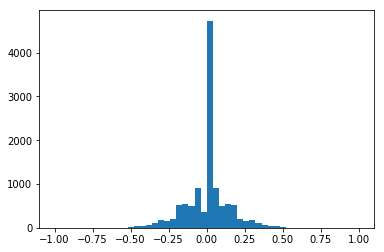

In [17]:
plt.hist(augmented_measurements, 50)
plt.show()

### Construct Model

In [21]:
batch_size = 32

X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

# How can I delete the lists that created the NP arrays above in order to free up RAM?

# X_train = np.array(images)
# y_train = np.array(measurements)

# barebones model
# model = Sequential()
# model.add(Flatten(input_shape=(160,320,3)))
# model.add(Dense(128))
# model.add(Dense(84))
# model.add(Dense(1))

model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
# model.add(Convolution2D(nb_row=5, nb_col=5, nb_filter=16))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# Model 3
# model = Sequential()
# model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
# model.add(Convolution2D(nb_row=3, nb_col=3, nb_filter=32))
# model.add(MaxPooling2D(strides=None))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(84))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))

### Train, Validate, and Save Model

In [20]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5, batch_size=batch_size)

model.save('model-v1.h5')

Train on 9368 samples, validate on 2343 samples
Epoch 1/5
9368/9368 [==============================] - 22s - loss: 3.8036 - val_loss: 0.0231
Epoch 2/5
9368/9368 [==============================] - 21s - loss: 0.0924 - val_loss: 0.0231
Epoch 3/5
9368/9368 [==============================] - 21s - loss: 0.0396 - val_loss: 0.0230
Epoch 4/5
9368/9368 [==============================] - 21s - loss: 0.0422 - val_loss: 0.0229
Epoch 5/5
9368/9368 [==============================] - 21s - loss: 0.0239 - val_loss: 0.0229
